In [1]:
# Data Science Coronavírus

### Importando as bibliotecas para processamento

In [1]:
import pandas as pd
import numpy as np
from datetime import date

### Pegando o dia de hoje

In [2]:
from datetime import date
dia = (date.today())
dia = str(dia)
dia = dia[-2:]
dia = int(dia)
print(dia)

13


### Armazenando os Links do Dataset em uma Lista

In [3]:
#Base de dados
#https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data?fbclid=IwAR1C6Cf_k5bpeEF5v1I9G-OlXeMZd0B1JreUw4ayc5tuOLYVSKvyunFaam8

base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports'
lista_links = []
#Pegando os links do mês de janeiro
for c in range(22, 32):
    lista_links.append(str(base_url+f'/01-{c}-2020.csv'))
#Pegando os links do mês de fevereiro
for c in range(1, 30):
    if c <= 9:
        lista_links.append(str(base_url+f'/02-0{c}-2020.csv'))
    else:
        lista_links.append(str(base_url+f'/02-{c}-2020.csv'))
#Pegando os links do mês de março
for c in range(1, 32):
    if c <= 9:
        lista_links.append(str(base_url+f'/03-0{c}-2020.csv'))
    else:
        lista_links.append(str(base_url+f'/03-{c}-2020.csv'))
#Pegando os links do mês de abril
for c in range(1,dia):
    if c <= 9:
        lista_links.append(str(base_url+f'/04-0{c}-2020.csv'))
    else:
        lista_links.append(str(base_url+f'/04-{c}-2020.csv'))


### Convertendo os Links em um Dataframe e Armazenando em uma Lista

In [4]:
lista = []
for c in lista_links:
    dados = pd.read_csv(c)
    np.array(dados)
    lista.append(dados)

### Visualizando e Descrevendo os Dados 

In [5]:
#Vamos visualizar uma tabela individualmente para observamos as suas colunas 
#lista[60].head()
for c in range(0, len(lista)):
    lista[c].rename(columns = {'Lat':'Latitude'}, inplace = True)
    lista[c].rename(columns = {'Long_':'Longitude'}, inplace = True)
lista[39]['Latitude'].head()

0    30.9756
1    36.0000
2    43.0000
3    23.3417
4    33.8820
Name: Latitude, dtype: float64

In [6]:
print(len(lista))
lista[0].info()

82
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  35 non-null     object 
 1   Country/Region  38 non-null     object 
 2   Last Update     38 non-null     object 
 3   Confirmed       29 non-null     float64
 4   Deaths          1 non-null      float64
 5   Recovered       1 non-null      float64
dtypes: float64(3), object(3)
memory usage: 1.9+ KB


In [7]:
round(lista[0].describe(),2)

,Confirmed,Deaths,Recovered
count,29.00,1.0,1.0
mean,19.14,17.0,28.0
std,81.88,NaN,NaN
min,1.00,17.0,28.0
25%,1.00,17.0,28.0
50%,2.00,17.0,28.0
75%,5.00,17.0,28.0
max,444.00,17.0,28.0


### Criando as Listas que serão utilizadas para plotar o gráfico

In [8]:
lista_mortos = []
lista_casos_confirmados = []
lista_recuperados = []

for c in range(0,len(lista)):
    lista_mortos.append((lista[c]['Deaths']).sum())
    lista_casos_confirmados.append((lista[c]['Confirmed']).sum())
    lista_recuperados.append((lista[c]['Recovered']).sum())

### Plotando o Gráfico

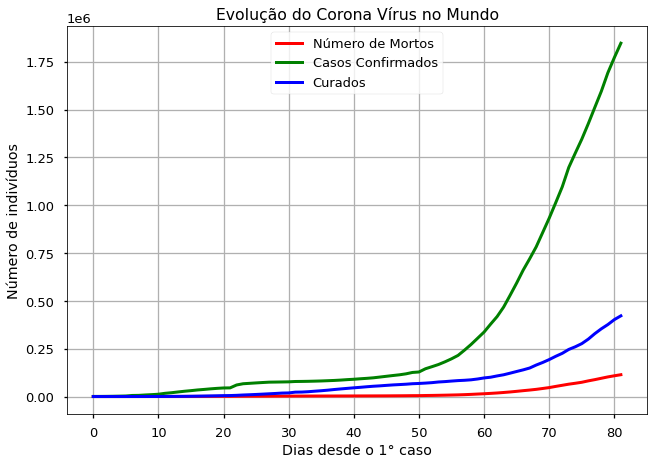

In [9]:
import matplotlib.pyplot as plt
x = [i for i in range(0, len(lista_mortos))]
plt.style.use('seaborn-talk')
y_mortos = lista_mortos
y_casos_confirmados = lista_casos_confirmados
y_recuperados = lista_recuperados
plt.plot(x, y_mortos, color='red', label='Número de Mortos', linewidth=3.0)
plt.plot(x, y_casos_confirmados, color='green', label='Casos Confirmados', linewidth=3.0)
plt.plot(x, y_recuperados, color='blue', label='Curados', linewidth=3.0)
plt.xlabel('Dias desde o 1° caso')
plt.ylabel('Número de indivíduos')
plt.title('Evolução do Corona Vírus no Mundo')
#fig = plt.gcf()
#fig.set_size_inches(10, 8)
plt.grid(True)
plt.legend(loc='upper center')
plt.savefig('corona.png')
plt.show()


### Estilos Disponíveis

In [10]:
#Para consultar os estilos disponíveis, rode esse código
np.reshape(plt.style.available, (1,-1))

array([['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic',
        'dark_background', 'fast', 'fivethirtyeight', 'ggplot',
        'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind',
        'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid',
        'seaborn-deep', 'seaborn-muted', 'seaborn-notebook',
        'seaborn-paper', 'seaborn-pastel', 'seaborn-poster',
        'seaborn-talk', 'seaborn-ticks', 'seaborn-white',
        'seaborn-whitegrid', 'tableau-colorblind10']], dtype='<U20')

### Criando outro Dataframe com os dados mais atuais

In [11]:
dados_atuais = {'Número de Mortos':y_mortos[len(y_mortos)-1],
                'Casos Confirmados':y_casos_confirmados[len(y_casos_confirmados)-1],
                'Curados':y_recuperados[len(y_recuperados)-1]}

In [12]:
dados_atuais = pd.DataFrame([dados_atuais])

In [13]:
dados_atuais

,Número de Mortos,Casos Confirmados,Curados
0,114089,1846680,421722


### Calculando a Taxa de Mortalidade do Vírus

In [14]:
#Taxa de Mortalidade do vírus
dados_atuais['Taxa_Mortalidade(%)'] = (dados_atuais['Número de Mortos']/dados_atuais['Casos Confirmados'])*100
dados_atuais

,Número de Mortos,Casos Confirmados,Curados,Taxa_Mortalidade(%)
0,114089,1846680,421722,6.17806


### Criando um Mapa de Calor com alguns lugares afetados pelo Vírus

In [19]:
import folium
import math
from folium.plugins import HeatMap
mapa = folium.Map(location=[10,10],zoom_start=1.5,tiles='Stamen Toner')
locais = []

for c in range(39, len(lista)):
    for lat,lon in zip(lista[c]['Latitude'], lista[c]['Longitude']):
        if math.isnan(lat) == True or math.isnan(lon) == True:
            pass
        else:
            temp = [lat,lon]
            locais.append(temp)


HeatMap(locais, radius=16).add_to(mapa)
mapa.save('corona_mapa.html')

ModuleNotFoundError: No module named 'folium'

In [ ]:
mapa

![corona_heat_map](world_heat_map.png)

In [17]:
!pip3 install folium --user

  Using cached https://files.pythonhosted.org/packages/a4/f0/44e69d50519880287cc41e7c8a6acc58daa9a9acf5f6afc52bcc70f69a6d/folium-0.11.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/30/9e/f663a2aa66a09d838042ae1a2c5659828bb9b41ea3a6efa20a20fd92b121/Jinja2-2.11.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/13/fb/9eacc24ba3216510c6b59a4ea1cd53d87f25ba76237d7f4393abeaf4c94e/branca-0.4.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/0c/12/37f68957526d1ec0883b521934b4e1b8ff3dd8e4fab858a5bf3e487bcee9/MarkupSafe-1.1.1-cp38-cp38-macosx_10_9_x86_64.whl
You should consider upgrading via the 'pip install --upgrade pip' command.
